# Yankees Win Pace 2022
Goals
- Import schedule and record data using pybaseball package
- Scrape 2022 Yankees record 

In [1]:
from pybaseball import schedule_and_record
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path  
import re
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select

from webdriver_manager.chrome import ChromeDriverManager

/Users/bryanbaker/.pyenv/versions/3.10.3/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
yankees1 = schedule_and_record(1927, 'NYY')
yankees2 = schedule_and_record(1961, 'NYY')
yankees3 = schedule_and_record(1998, 'NYY')
mariners = schedule_and_record(2001, 'SEA')

In [3]:
mariners

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Monday, Apr 2",SEA,Home,OAK,W,5.0,4.0,9.0,1-0,1.0,up 0.5,Rhodes,Mecir,Sasaki,3:23,N,45911.0,1.20,1,None
2,"Tuesday, Apr 3",SEA,Home,OAK,L,1.0,5.0,9.0,1-1,1.0,Tied,Zito,Halama,None,2:57,N,27212.0,1.23,-1,None
3,"Wednesday, Apr 4",SEA,Home,OAK,W,10.0,2.0,9.0,2-1,1.0,Tied,Sele,Heredia,None,3:07,D,31382.0,1.21,1,None
4,"Friday, Apr 6",SEA,@,TEX,W,9.0,7.0,10.0,3-1,1.0,up 1.0,Rhodes,Zimmerman,Sasaki,3:43,N,34684.0,1.24,2,None
5,"Saturday, Apr 7",SEA,@,TEX,W,6.0,5.0,9.0,4-1,1.0,up 2.0,Franklin,Davis,Sasaki,3:27,N,41651.0,1.26,3,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,"Wednesday, Oct 3",SEA,@,ANA,W,4.0,3.0,9.0,113-45,1.0,up15.0,Charlton,Levine,Sasaki,3:22,N,18503.0,.00,3,2001-09-12 (9/11 attack)
159,"Thursday, Oct 4",SEA,Home,TEX,W,16.0,1.0,9.0,114-45,1.0,up15.0,Tomko,Myette,None,3:16,N,45302.0,.00,4,2001-09-13 (9/11 attack)
160,"Friday, Oct 5",SEA,Home,TEX,W,6.0,2.0,9.0,115-45,1.0,up15.0,Moyer,Helling,None,2:16,N,45333.0,.00,5,2001-09-14 (9/11 attack)
161,"Saturday, Oct 6",SEA,Home,TEX,W,1.0,0.0,9.0,116-45,1.0,up15.0,Pineiro,Davis,Sasaki,2:19,N,45607.0,.00,6,2001-09-15 (9/11 attack)


In [4]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.baseball-reference.com/teams/NYY/2022-schedule-scores.shtml')
time.sleep(1)
yankees4 = pd.read_html(driver.find_element(By.XPATH, '/html/body/div[2]/div[5]/div[5]/div[2]/table').get_attribute('outerHTML'))
yankees4 = yankees4[0]
yankees4

/var/folders/2v/rhntcrz56677qkbl_ggqtpl40000gn/T/ipykernel_48288/415653719.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


,Gm#,Date,Unnamed: 2,Tm,Unnamed: 4,Opp,W/L,R,RA,Inn,...,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
0,1,"Friday, Apr 8",boxscore,NYY,NaN,BOS,W-wo,6,5,11,...,Tied,King,Crawford,NaN,3:56,D,46097,.97,+,NaN
1,2,"Saturday, Apr 9",boxscore,NYY,NaN,BOS,W,4,2,NaN,...,Tied,Luetge,Pivetta,Chapman,2:58,D,46882,1.03,++,NaN
2,3,"Sunday, Apr 10",boxscore,NYY,NaN,BOS,L,3,4,NaN,...,1.0,Crawford,Schmidt,Diekman,3:40,N,40108,1.04,-,NaN
3,4,"Monday, Apr 11",boxscore,NYY,NaN,TOR,L,0,3,NaN,...,1.0,Manoah,Taillon,Romano,3:03,N,26211,1.05,--,NaN
4,5,"Tuesday, Apr 12",boxscore,NYY,NaN,TOR,W,4,0,NaN,...,1.0,Holmes,Kikuchi,NaN,3:07,N,25068,1.03,+,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,159,"Monday, Oct 3",preview,NYY,@,TEX,7:05 pm,7:05 pm,7:05 pm,"Game Preview, and Matchups",...,"Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups",NaN,NaN,NaN
164,160,"Tuesday, Oct 4",preview,NYY,@,TEX,2:05 pm,2:05 pm,2:05 pm,"Game Preview, and Matchups",...,"Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups",NaN,NaN,NaN
165,161,"Tuesday, Oct 4",preview,NYY,@,TEX,8:05 pm,8:05 pm,8:05 pm,"Game Preview, and Matchups",...,"Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups",NaN,NaN,NaN
166,162,"Wednesday, Oct 5",preview,NYY,@,TEX,4:05 pm,4:05 pm,4:05 pm,"Game Preview, and Matchups",...,"Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups","Game Preview, and Matchups",NaN,NaN,NaN


In [5]:
pd.set_option('display.max_columns', None)
yankees4 = yankees4.dropna(subset=['cLI'])

In [6]:
yankees4 = yankees4[yankees4['Gm#'].str.contains('Gm#')==False]

In [7]:
yankees4['W/L'] = yankees4['W/L'].str.replace('W-wo', 'W')
yankees4['W/L'] = yankees4['W/L'].str.replace('L-wo', 'L')
yankees3['W/L'] = yankees3['W/L'].str.replace('W-wo', 'W')
yankees3['W/L'] = yankees3['W/L'].str.replace('L-wo', 'L')
yankees2['W/L'] = yankees2['W/L'].str.replace('W-wo', 'W')
yankees2['W/L'] = yankees2['W/L'].str.replace('L-wo', 'L')
yankees1['W/L'] = yankees1['W/L'].str.replace('W-wo', 'W')
yankees1['W/L'] = yankees1['W/L'].str.replace('L-wo', 'L')
yankees1['W/L'] = yankees1['W/L'].str.replace('W &H', 'W')
yankees2['W/L'] = yankees2['W/L'].str.replace('W &H', 'W')
mariners['W/L'] = mariners['W/L'].str.replace('W-wo', 'W')
mariners['W/L'] = mariners['W/L'].str.replace('L-wo', 'L')

In [8]:
yankees1['win-count'] = np.where(yankees1['W/L']=='W', 1, 0).cumsum()
yankees2['win-count'] = np.where(yankees2['W/L']=='W', 1, 0).cumsum()
yankees3['win-count'] = np.where(yankees3['W/L']=='W', 1, 0).cumsum()
yankees4['win-count'] = np.where(yankees4['W/L']=='W', 1, 0).cumsum()
mariners['win-count'] = np.where(mariners['W/L']=='W', 1, 0).cumsum()

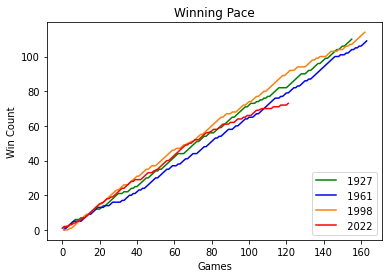

In [9]:
plt.plot(yankees1['win-count'], 'g', label=" 1927")
plt.plot(yankees2['win-count'], 'b', label=" 1961")
plt.plot(yankees3['win-count'], 'tab:orange', label=" 1998")
plt.plot(yankees4['win-count'], 'r', label=" 2022")
plt.legend(loc=4)
plt.xlabel('Games')
plt.ylabel('Win Count')
plt.title('Winning Pace');
plt.savefig('charts/win-count.svg')

In [10]:
yankees4.R = yankees4.R.astype(float)
yankees4.RA = yankees4.RA.astype(float)

In [11]:
yankees1['scorediff'] = (yankees1['R'] - yankees1['RA']).cumsum()
yankees2['scorediff'] = (yankees2['R'] - yankees2['RA']).cumsum()
yankees3['scorediff'] = (yankees3['R'] - yankees3['RA']).cumsum()
yankees4['scorediff'] = (yankees4['R'] - yankees4['RA']).cumsum()


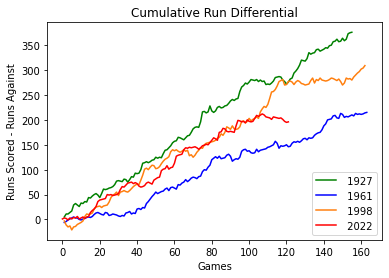

In [12]:
plt.plot(yankees1['scorediff'], 'g', label=" 1927")
plt.plot(yankees2['scorediff'], 'b', label=" 1961")
plt.plot(yankees3['scorediff'], 'tab:orange', label=" 1998")
plt.plot(yankees4['scorediff'], 'r', label=" 2022")
plt.legend(loc=4)
plt.xlabel('Games')
plt.ylabel('Runs Scored - Runs Against')
plt.title('Cumulative Run Differential');
plt.savefig('charts/run-differential.svg')

In [13]:
yankees1

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled,win-count,scorediff
1,"Tuesday, Apr 12",NYY,Home,PHA,W,8.0,3.0,9.0,1-0,1.0,Tied,Hoyt,Grove,None,2:05,D,72000.0,2.55,1,None,1,5.0
2,"Wednesday, Apr 13",NYY,Home,PHA,W,10.0,4.0,9.0,2-0,1.0,up 0.5,Ruether,Gray,None,2:15,D,8000.0,2.71,2,None,2,11.0
3,"Thursday, Apr 14",NYY,Home,PHA,T,9.0,9.0,10.0,2-0,1.0,Tied,None,None,None,2:50,D,9000.0,2.84,2,None,2,11.0
4,"Friday, Apr 15",NYY,Home,PHA,W,6.0,3.0,9.0,3-0,1.0,Tied,Pennock,Ehmke,None,2:27,D,16000.0,2.86,3,None,3,14.0
5,"Saturday, Apr 16",NYY,Home,BOS,W,5.0,2.0,9.0,4-0,1.0,up 1.0,Shocker,Ruffing,None,2:05,D,25000.0,3.00,4,None,4,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,"Sunday, Sep 25",NYY,Home,DET,L,1.0,6.0,9.0,106-44,1.0,up16.5,Whitehill,Hoyt,None,2:20,D,25000.0,.00,-1,None,106,359.0
152,"Tuesday, Sep 27",NYY,Home,PHA,W,7.0,4.0,9.0,107-44,1.0,up17.5,Pennock,Grove,Moore,2:12,D,15000.0,.00,1,None,107,362.0
153,"Thursday, Sep 29",NYY,Home,WSH,W,15.0,4.0,9.0,108-44,1.0,up18.5,Shocker,Lisenbee,Shawkey,1:58,D,7500.0,.00,2,None,108,373.0
154,"Friday, Sep 30",NYY,Home,WSH,W,4.0,2.0,9.0,109-44,1.0,up19.0,Pennock,Zachary,None,1:38,D,8000.0,.00,3,None,109,375.0


In [14]:
yankees1.to_csv('data/yankees_1927.csv')
yankees2.to_csv('data/yankees_1961.csv')
yankees3.to_csv('data/yankees_1998.csv')
yankees4.to_csv('data/yankees_2022.csv')
mariners.to_csv('data/mariners_2001.csv')

In [15]:
pd.set_option('display.max_rows', None)
yankees4

,Gm#,Date,Unnamed: 2,Tm,Unnamed: 4,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled,win-count,scorediff
0,1,"Friday, Apr 8",boxscore,NYY,NaN,BOS,W,6.0,5.0,11,1-0,1,Tied,King,Crawford,NaN,3:56,D,46097,.97,+,NaN,1,1.0
1,2,"Saturday, Apr 9",boxscore,NYY,NaN,BOS,W,4.0,2.0,NaN,2-0,1,Tied,Luetge,Pivetta,Chapman,2:58,D,46882,1.03,++,NaN,2,3.0
2,3,"Sunday, Apr 10",boxscore,NYY,NaN,BOS,L,3.0,4.0,NaN,2-1,2,1.0,Crawford,Schmidt,Diekman,3:40,N,40108,1.04,-,NaN,2,2.0
3,4,"Monday, Apr 11",boxscore,NYY,NaN,TOR,L,0.0,3.0,NaN,2-2,3,1.0,Manoah,Taillon,Romano,3:03,N,26211,1.05,--,NaN,2,-1.0
4,5,"Tuesday, Apr 12",boxscore,NYY,NaN,TOR,W,4.0,0.0,NaN,3-2,2,1.0,Holmes,Kikuchi,NaN,3:07,N,25068,1.03,+,NaN,3,3.0
5,6,"Wednesday, Apr 13",boxscore,NYY,NaN,TOR,L,4.0,6.0,NaN,3-3,3,1.0,Cimber,Green,Romano,3:10,N,30109,1.06,-,NaN,3,1.0
6,7,"Thursday, Apr 14",boxscore,NYY,NaN,TOR,W,3.0,0.0,NaN,4-3,1,Tied,Severino,Gausman,King,3:06,N,37255,1.02,+,NaN,4,4.0
7,8,"Friday, Apr 15",boxscore,NYY,@,BAL,L,1.0,2.0,11,4-4,2,1.0,Krehbiel,Schmidt,NaN,4:15,N,32197,1.05,-,NaN,4,3.0
8,9,"Saturday, Apr 16",boxscore,NYY,@,BAL,W,5.0,2.0,NaN,5-4,1,Tied,Sears,Lakins,Holmes,3:26,N,28179,1.01,+,NaN,5,6.0
9,10,"Sunday, Apr 17",boxscore,NYY,@,BAL,L,0.0,5.0,NaN,5-5,3,1.0,Lopez,Loaisiga,NaN,3:16,D,25938,1.07,-,NaN,5,1.0


In [16]:
# Scrape for Judge
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.baseball-reference.com/players/gl.fcgi?id=judgeaa01&t=b&year=2022')
time.sleep(1)
judge = pd.read_html(driver.find_element(By.XPATH, '/html/body/div[2]/div[5]/div[4]/div[3]/table').get_attribute('outerHTML'))
judge = judge[0]
judge

/var/folders/2v/rhntcrz56677qkbl_ggqtpl40000gn/T/ipykernel_48288/3773837989.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


,Rk,Gcar,Gtm,Date,Tm,Unnamed: 5,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,DFS(DK),DFS(FD),Pos
0,1,573,1,Apr 8,NYY,NaN,BOS,"W,6-5",CG(11),5,5,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,.400,.400,.600,1.000,2,1.21,-0.002,1.18,0.00%,-0.22,10.00,12.20,RF
1,2,574,2,Apr 9,NYY,NaN,BOS,"W,4-2",CG,4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,.250,.333,.375,.708,2,1.01,0.004,1.04,0.00%,-0.16,4.00,6.20,CF RF
2,3,575,3,Apr 10,NYY,NaN,BOS,"L,3-4",CG,5,5,0,2,0,0,0,0,0,0,2,0,0,0,0,1,1,0,.308,.357,.385,.742,3,1.86,-0.054,1.93,-0.03%,0.36,11.00,12.00,RF
3,4,576,4,Apr 11,NYY,NaN,TOR,"L,0-3",CG,4,3,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,.250,.333,.313,.646,3,1.28,-0.044,1.34,-0.03%,-0.32,2.00,3.00,RF
4,5,577,5,Apr 12,NYY,NaN,TOR,"W,4-0",CG,4,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,.250,.318,.350,.668,2,.56,-0.037,.58,-0.02%,0.46,5.00,6.00,CF RF
5,6,578,6,Apr 13,NYY,NaN,TOR,"L,4-6",CG,5,4,1,2,0,0,1,1,1,0,1,0,0,0,0,0,0,0,.292,.370,.500,.870,2,1.36,0.111,1.44,0.07%,0.92,19.00,24.70,RF
6,7,579,7,Apr 14,NYY,NaN,TOR,"W,3-0",CG,4,4,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,.286,.355,.500,.855,2,.62,-0.043,.63,-0.03%,-0.12,7.00,9.20,CF RF
7,8,580,8,Apr 15,NYY,@,BAL,"L,1-2",10-10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.276,.344,.483,.827,8,3.94,-0.106,4.15,-0.07%,-0.46,0.00,0.00,PH
8,9,581,9,Apr 16,NYY,@,BAL,"W,5-2",CG,5,3,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,.281,.361,.469,.830,2,1.26,0.068,1.27,0.04%,0.46,7.00,9.20,RF
9,10,582,10,Apr 17,NYY,@,BAL,"L,0-5",CG,4,3,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,.257,.350,.429,.779,2,1.42,-0.100,1.51,-0.06%,-0.67,2.00,3.00,RF


In [17]:
# Drop unnecessary columns
judge = judge.drop(columns=['Rk', 'Gcar', 'Unnamed: 5', 'RE24', 'DFS(DK)', 'DFS(FD)' ])

In [18]:
# Check data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
judge

,Gtm,Date,Tm,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,Pos
0,1,Apr 8,NYY,BOS,"W,6-5",CG(11),5,5,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,.400,.400,.600,1.000,2,1.21,-0.002,1.18,0.00%,RF
1,2,Apr 9,NYY,BOS,"W,4-2",CG,4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,.250,.333,.375,.708,2,1.01,0.004,1.04,0.00%,CF RF
2,3,Apr 10,NYY,BOS,"L,3-4",CG,5,5,0,2,0,0,0,0,0,0,2,0,0,0,0,1,1,0,.308,.357,.385,.742,3,1.86,-0.054,1.93,-0.03%,RF
3,4,Apr 11,NYY,TOR,"L,0-3",CG,4,3,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,.250,.333,.313,.646,3,1.28,-0.044,1.34,-0.03%,RF
4,5,Apr 12,NYY,TOR,"W,4-0",CG,4,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,.250,.318,.350,.668,2,.56,-0.037,.58,-0.02%,CF RF
5,6,Apr 13,NYY,TOR,"L,4-6",CG,5,4,1,2,0,0,1,1,1,0,1,0,0,0,0,0,0,0,.292,.370,.500,.870,2,1.36,0.111,1.44,0.07%,RF
6,7,Apr 14,NYY,TOR,"W,3-0",CG,4,4,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,.286,.355,.500,.855,2,.62,-0.043,.63,-0.03%,CF RF
7,8,Apr 15,NYY,BAL,"L,1-2",10-10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.276,.344,.483,.827,8,3.94,-0.106,4.15,-0.07%,PH
8,9,Apr 16,NYY,BAL,"W,5-2",CG,5,3,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,.281,.361,.469,.830,2,1.26,0.068,1.27,0.04%,RF
9,10,Apr 17,NYY,BAL,"L,0-5",CG,4,3,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,.257,.350,.429,.779,2,1.42,-0.100,1.51,-0.06%,RF


In [19]:
# More cleaning + adding HR count column
judge = judge[judge['Rslt'].str.contains('Rslt')==False]
judge = judge[judge['Gtm'].notna()]
judge.HR = judge.HR.astype(int)
judge['HR_count'] = judge['HR'].cumsum()
judge

,Gtm,Date,Tm,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,Pos,HR_count
0,1,Apr 8,NYY,BOS,"W,6-5",CG(11),5,5,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,.400,.400,.600,1.000,2,1.21,-0.002,1.18,0.00%,RF,0
1,2,Apr 9,NYY,BOS,"W,4-2",CG,4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,.250,.333,.375,.708,2,1.01,0.004,1.04,0.00%,CF RF,0
2,3,Apr 10,NYY,BOS,"L,3-4",CG,5,5,0,2,0,0,0,0,0,0,2,0,0,0,0,1,1,0,.308,.357,.385,.742,3,1.86,-0.054,1.93,-0.03%,RF,0
3,4,Apr 11,NYY,TOR,"L,0-3",CG,4,3,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,.250,.333,.313,.646,3,1.28,-0.044,1.34,-0.03%,RF,0
4,5,Apr 12,NYY,TOR,"W,4-0",CG,4,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,.250,.318,.350,.668,2,.56,-0.037,.58,-0.02%,CF RF,0
5,6,Apr 13,NYY,TOR,"L,4-6",CG,5,4,1,2,0,0,1,1,1,0,1,0,0,0,0,0,0,0,.292,.370,.500,.870,2,1.36,0.111,1.44,0.07%,RF,1
6,7,Apr 14,NYY,TOR,"W,3-0",CG,4,4,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,.286,.355,.500,.855,2,.62,-0.043,.63,-0.03%,CF RF,1
7,8,Apr 15,NYY,BAL,"L,1-2",10-10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.276,.344,.483,.827,8,3.94,-0.106,4.15,-0.07%,PH,1
8,9,Apr 16,NYY,BAL,"W,5-2",CG,5,3,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,.281,.361,.469,.830,2,1.26,0.068,1.27,0.04%,RF,1
9,10,Apr 17,NYY,BAL,"L,0-5",CG,4,3,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,.257,.350,.429,.779,2,1.42,-0.100,1.51,-0.06%,RF,1


In [20]:
# Scrape for Maris
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.baseball-reference.com/players/gl.fcgi?id=marisro01&t=b&year=1961')
time.sleep(1)
maris = pd.read_html(driver.find_element(By.ID, 'batting_gamelogs').get_attribute('outerHTML'))
maris = maris[0]
maris

/var/folders/2v/rhntcrz56677qkbl_ggqtpl40000gn/T/ipykernel_48288/3866999829.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


,Rk,Gcar,Gtm,Date,Tm,Unnamed: 5,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,Pos
0,1,525,1,Apr 11,NYY,NaN,MIN,"L,0-6",CG,3,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,.000,.000,.000,.000,5,.91,0.019,1.95,0.02%,0.24,RF
1,2,526,2,Apr 15,NYY,NaN,KCA,"W,5-3",CG,4,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,.167,.286,.167,.452,6,.56,0.042,1.04,0.05%,0.23,RF
2,3,527,3,Apr 17,NYY,NaN,KCA,"W,3-0",CG,4,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,.111,.273,.111,.384,5,.40,-0.020,.80,-0.02%,-0.50,RF
3,4,528,4,Apr 20 (1),NYY,NaN,LAA,"W,7-5",CG,4,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,.083,.267,.083,.350,5,.49,-0.024,1.02,-0.03%,-0.23,RF
4,5,529,5,Apr 20 (2),NYY,NaN,LAA,"W,4-2",CG,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.125,.263,.125,.388,5,.89,0.032,2.03,0.04%,0.32,RF
5,6,530,6,Apr 21,NYY,@,BAL,"W,4-2",CG,4,2,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,.167,.348,.167,.514,7,.83,0.100,2.02,0.15%,1.09,RF
6,7,531,7,Apr 22 (1),NYY,@,BAL,"L,3-5",CG,4,3,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,.143,.296,.143,.439,5,1.83,-0.218,4.72,-0.34%,-1.54,RF
7,8,532,8,Apr 22 (2),NYY,@,BAL,"T,5-5",CG(7),4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,.125,.290,.125,.415,5,.84,-0.015,2.09,-0.02%,-0.32,RF
8,9,533,9,Apr 23,NYY,@,BAL,"L,1-4",CG,4,3,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,.148,.314,.148,.462,5,.83,0.023,2.18,0.04%,0.13,RF
9,10,534,10,Apr 24,NYY,@,DET,"L,3-4",CG,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.161,.308,.161,.469,3,.99,-0.078,2.54,-0.12%,-0.45,RF


In [21]:
# Clean and add HR Count 
maris = maris.drop(columns=['Rk', 'Gcar', 'Unnamed: 5', 'RE24'])
maris = maris[maris['Rslt'].str.contains('Rslt')==False]
maris.HR = maris.HR.astype(int)
maris.WPA = maris.WPA.astype(float)
maris['HR_count'] = maris['HR'].cumsum()
maris = maris[maris['Gtm'].notna()]
maris

,Gtm,Date,Tm,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,Pos,HR_count
0,1,Apr 11,NYY,MIN,"L,0-6",CG,3,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,.000,.000,.000,.000,5,.91,0.019,1.95,0.02%,RF,0
1,2,Apr 15,NYY,KCA,"W,5-3",CG,4,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,.167,.286,.167,.452,6,.56,0.042,1.04,0.05%,RF,0
2,3,Apr 17,NYY,KCA,"W,3-0",CG,4,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,.111,.273,.111,.384,5,.40,-0.020,.80,-0.02%,RF,0
3,4,Apr 20 (1),NYY,LAA,"W,7-5",CG,4,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,.083,.267,.083,.350,5,.49,-0.024,1.02,-0.03%,RF,0
4,5,Apr 20 (2),NYY,LAA,"W,4-2",CG,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.125,.263,.125,.388,5,.89,0.032,2.03,0.04%,RF,0
5,6,Apr 21,NYY,BAL,"W,4-2",CG,4,2,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,.167,.348,.167,.514,7,.83,0.100,2.02,0.15%,RF,0
6,7,Apr 22 (1),NYY,BAL,"L,3-5",CG,4,3,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,.143,.296,.143,.439,5,1.83,-0.218,4.72,-0.34%,RF,0
7,8,Apr 22 (2),NYY,BAL,"T,5-5",CG(7),4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,.125,.290,.125,.415,5,.84,-0.015,2.09,-0.02%,RF,0
8,9,Apr 23,NYY,BAL,"L,1-4",CG,4,3,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,.148,.314,.148,.462,5,.83,0.023,2.18,0.04%,RF,0
9,10,Apr 24,NYY,DET,"L,3-4",CG,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.161,.308,.161,.469,3,.99,-0.078,2.54,-0.12%,RF,0


In [22]:
# Scrape for Ruth
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.baseball-reference.com/players/gl.fcgi?id=ruthba01&t=b&year=1927')
time.sleep(1)
ruth = pd.read_html(driver.find_element(By.ID, 'batting_gamelogs').get_attribute('outerHTML'))
ruth = ruth[0]
ruth

/var/folders/2v/rhntcrz56677qkbl_ggqtpl40000gn/T/ipykernel_48288/2900411504.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


,Rk,Gcar,Gtm,Date,Tm,Unnamed: 5,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,Pos
0,1,1352,1,Apr 12,NYY,NaN,PHA,"W,8-3",GS-6,3,3,0,0,0,0,0,0,0,0,2,0,0,NaN,0,NaN,0,0,.000,.000,.000,.000,3,1.14,-0.160,2.89,-0.25%,-1.91,RF
1,2,1353,2,Apr 13,NYY,NaN,PHA,"W,10-4",CG,5,4,2,2,0,0,0,0,1,0,1,0,0,NaN,0,NaN,0,0,.286,.375,.286,.661,3,.78,0.065,2.11,0.11%,1.28,RF
2,3,1354,3,Apr 14,NYY,NaN,PHA,"T,9-9",CG(10),5,3,2,1,0,0,0,0,2,0,0,0,0,NaN,0,NaN,0,0,.300,.462,.300,.762,3,1.53,0.001,4.33,0.00%,0.14,RF
3,4,1355,4,Apr 15,NYY,NaN,PHA,"W,6-3",CG,5,4,2,2,0,0,1,1,1,0,1,0,0,NaN,0,NaN,0,0,.357,.500,.571,1.071,3,.48,0.114,1.37,0.20%,0.95,RF
4,5,1356,5,Apr 16,NYY,NaN,BOS,"W,5-2",CG,4,2,2,0,0,0,0,0,2,0,0,0,0,NaN,0,NaN,0,0,.313,.500,.500,1.000,3,1.39,0.014,4.16,0.03%,0.25,RF
5,6,1357,6,Apr 17,NYY,NaN,BOS,"W,14-2",CG,5,3,2,1,0,0,0,0,2,0,0,0,0,NaN,0,NaN,0,0,.316,.519,.474,.992,3,.40,0.020,1.28,0.04%,0.75,RF
6,7,1358,7,Apr 18,NYY,NaN,BOS,"W,3-0",CG,4,3,1,1,0,0,0,0,1,0,1,0,0,NaN,0,NaN,0,0,.318,.516,.455,.971,3,.66,0.041,2.22,0.08%,0.28,RF
7,8,1359,8,Apr 19,NYY,NaN,BOS,"L,3-6",CG,4,4,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,0,0,.269,.457,.385,.842,3,1.12,-0.153,4.03,-0.33%,-1.69,RF
8,9,1360,9,Apr 20,NYY,@,PHA,"L,5-8",CG,4,4,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,0,0,.233,.410,.333,.744,3,.88,-0.054,3.18,-0.12%,-0.68,LF
9,10,1361,10,Apr 21,NYY,@,PHA,"W,13-6",CG,6,2,2,1,0,0,0,0,4,0,0,0,0,NaN,0,NaN,0,0,.250,.467,.344,.810,3,.94,0.087,3.11,0.17%,1.63,LF


In [23]:
# Clean and add HR count column
ruth = ruth.drop(columns=['Rk', 'Gcar', 'Unnamed: 5', 'RE24'])
ruth = ruth[ruth['Rslt'].str.contains('Rslt')==False]
ruth.HR = ruth.HR.astype(int)
ruth['HR_count'] = ruth['HR'].cumsum()
ruth = ruth[ruth['Gtm'].notna()]
ruth

,Gtm,Date,Tm,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,Pos,HR_count
0,1,Apr 12,NYY,PHA,"W,8-3",GS-6,3,3,0,0,0,0,0,0,0,0,2,0,0,NaN,0,NaN,0,0,.000,.000,.000,.000,3,1.14,-0.160,2.89,-0.25%,RF,0
1,2,Apr 13,NYY,PHA,"W,10-4",CG,5,4,2,2,0,0,0,0,1,0,1,0,0,NaN,0,NaN,0,0,.286,.375,.286,.661,3,.78,0.065,2.11,0.11%,RF,0
2,3,Apr 14,NYY,PHA,"T,9-9",CG(10),5,3,2,1,0,0,0,0,2,0,0,0,0,NaN,0,NaN,0,0,.300,.462,.300,.762,3,1.53,0.001,4.33,0.00%,RF,0
3,4,Apr 15,NYY,PHA,"W,6-3",CG,5,4,2,2,0,0,1,1,1,0,1,0,0,NaN,0,NaN,0,0,.357,.500,.571,1.071,3,.48,0.114,1.37,0.20%,RF,1
4,5,Apr 16,NYY,BOS,"W,5-2",CG,4,2,2,0,0,0,0,0,2,0,0,0,0,NaN,0,NaN,0,0,.313,.500,.500,1.000,3,1.39,0.014,4.16,0.03%,RF,1
5,6,Apr 17,NYY,BOS,"W,14-2",CG,5,3,2,1,0,0,0,0,2,0,0,0,0,NaN,0,NaN,0,0,.316,.519,.474,.992,3,.40,0.020,1.28,0.04%,RF,1
6,7,Apr 18,NYY,BOS,"W,3-0",CG,4,3,1,1,0,0,0,0,1,0,1,0,0,NaN,0,NaN,0,0,.318,.516,.455,.971,3,.66,0.041,2.22,0.08%,RF,1
7,8,Apr 19,NYY,BOS,"L,3-6",CG,4,4,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,0,0,.269,.457,.385,.842,3,1.12,-0.153,4.03,-0.33%,RF,1
8,9,Apr 20,NYY,PHA,"L,5-8",CG,4,4,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,0,0,.233,.410,.333,.744,3,.88,-0.054,3.18,-0.12%,LF,1
9,10,Apr 21,NYY,PHA,"W,13-6",CG,6,2,2,1,0,0,0,0,4,0,0,0,0,NaN,0,NaN,0,0,.250,.467,.344,.810,3,.94,0.087,3.11,0.17%,LF,1


In [24]:
# Scrape for Bonds
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.baseball-reference.com/players/gl.fcgi?id=bondsba01&t=b&year=2001')
time.sleep(1)
bonds = pd.read_html(driver.find_element(By.ID, 'batting_gamelogs').get_attribute('outerHTML'))
bonds = bonds[0]
bonds

/var/folders/2v/rhntcrz56677qkbl_ggqtpl40000gn/T/ipykernel_48288/2077800597.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


,Rk,Gcar,Gtm,Date,Tm,Unnamed: 5,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,Pos
0,1,2144,1,Apr 2,SFG,NaN,SDP,"W,3-2",CG,5,3,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,0,.333,.600,1.333,1.933,3,.90,0.109,.96,0.07%,1.11,LF
1,2,2145,2,Apr 4,SFG,NaN,SDP,"W,8-7",CG,5,4,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,.286,.500,.857,1.357,3,1.26,0.112,1.37,0.07%,0.23,LF
2,3,2146,3,Apr 5,SFG,NaN,SDP,"W,8-2",CG,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.273,.429,.636,1.065,3,.48,0.004,.54,0.00%,-0.16,LF
3,4,2147,4,Apr 6,SFG,@,LAD,"L,1-10",CG,4,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,.200,.333,.467,.800,3,.38,-0.037,.45,-0.03%,-0.70,LF
4,5,2148,5,Apr 7,SFG,@,LAD,"L,4-10",CG,4,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,.158,.273,.368,.641,3,.53,-0.017,.62,-0.01%,-0.27,LF
5,6,2149,6,Apr 8,SFG,@,LAD,"W,8-3",CG,5,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,.125,.222,.292,.514,3,.43,-0.077,.49,-0.05%,-1.28,LF
6,7,2150,7,Apr 10,SFG,@,SDP,"W,11-6",CG,5,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,.103,.188,.241,.429,3,.46,-0.075,.55,-0.05%,-1.56,LF
7,8,2151,9 (1),Apr 12,SFG,@,SDP,"L,3-8",CG,4,3,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,.125,.222,.344,.566,3,.65,0.095,.84,0.07%,0.97,LF
8,9,2152,10,Apr 13,SFG,@,MIL,"W,7-3",CG,5,3,1,2,1,0,1,3,1,0,0,0,0,1,0,0,0,0,.171,.268,.486,.754,3,1.07,0.121,1.18,0.08%,1.40,LF
9,10,2153,11,Apr 14,SFG,@,MIL,"L,6-11",CG,5,4,1,2,1,0,1,3,1,0,1,0,0,0,0,0,0,0,.205,.304,.590,.894,3,1.28,0.135,1.50,0.09%,3.02,LF


In [25]:
# Clean and add HR count column
bonds = bonds.drop(columns=['Rk', 'Gcar', 'Unnamed: 5', 'RE24'])
bonds = bonds[bonds['Rslt'].str.contains('Rslt')==False]
bonds = bonds[bonds['Gtm'].notna()]
bonds.HR = bonds.HR.astype(int)
bonds['HR_count'] = bonds['HR'].cumsum()
bonds

,Gtm,Date,Tm,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,Pos,HR_count
0,1,Apr 2,SFG,SDP,"W,3-2",CG,5,3,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,0,.333,.600,1.333,1.933,3,.90,0.109,.96,0.07%,LF,1
1,2,Apr 4,SFG,SDP,"W,8-7",CG,5,4,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,.286,.500,.857,1.357,3,1.26,0.112,1.37,0.07%,LF,1
2,3,Apr 5,SFG,SDP,"W,8-2",CG,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.273,.429,.636,1.065,3,.48,0.004,.54,0.00%,LF,1
3,4,Apr 6,SFG,LAD,"L,1-10",CG,4,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,.200,.333,.467,.800,3,.38,-0.037,.45,-0.03%,LF,1
4,5,Apr 7,SFG,LAD,"L,4-10",CG,4,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,.158,.273,.368,.641,3,.53,-0.017,.62,-0.01%,LF,1
5,6,Apr 8,SFG,LAD,"W,8-3",CG,5,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,.125,.222,.292,.514,3,.43,-0.077,.49,-0.05%,LF,1
6,7,Apr 10,SFG,SDP,"W,11-6",CG,5,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,.103,.188,.241,.429,3,.46,-0.075,.55,-0.05%,LF,1
7,9 (1),Apr 12,SFG,SDP,"L,3-8",CG,4,3,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,.125,.222,.344,.566,3,.65,0.095,.84,0.07%,LF,2
8,10,Apr 13,SFG,MIL,"W,7-3",CG,5,3,1,2,1,0,1,3,1,0,0,0,0,1,0,0,0,0,.171,.268,.486,.754,3,1.07,0.121,1.18,0.08%,LF,3
9,11,Apr 14,SFG,MIL,"L,6-11",CG,5,4,1,2,1,0,1,3,1,0,1,0,0,0,0,0,0,0,.205,.304,.590,.894,3,1.28,0.135,1.50,0.09%,LF,4


In [26]:
# Add WPA Count column
bonds['WPA_count'] = bonds['WPA'].cumsum()
maris['WPA_count'] = maris['WPA'].cumsum()
judge['WPA_count'] = judge['WPA'].cumsum()

In [27]:
# Change aLI to float
bonds.aLI = bonds.aLI.astype(float)
maris.aLI = maris.aLI.astype(float)
judge.aLI = judge.aLI.astype(float)

In [28]:
# Save data to CSV files
bonds.to_csv('data/bonds.csv')
maris.to_csv('data/maris.csv')
judge.to_csv('data/judge.csv')
ruth.to_csv('data/ruth.csv')

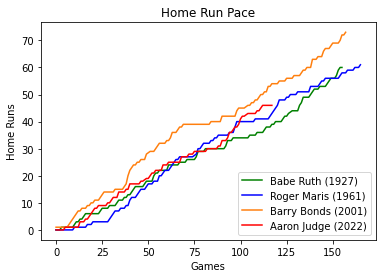

In [29]:
plt.plot(ruth['HR_count'], 'g', label="Babe Ruth (1927)")
plt.plot(maris['HR_count'], 'b', label="Roger Maris (1961)")
plt.plot(bonds['HR_count'], 'tab:orange', label="Barry Bonds (2001)")
plt.plot(judge['HR_count'], 'r', label="Aaron Judge (2022)")
plt.legend(loc=4)
plt.xlabel('Games')
plt.ylabel('Home Runs')
plt.title('Home Run Pace')
plt.savefig('charts/hr-pace.svg')